In [ ]:
import pandas as pd
import os



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
os.environ['KAGGLE_CONFIG_DIR']="/content/gdrive/MyDrive/Colab Notebooks/input"

In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/input"

/content/gdrive/MyDrive/Colab Notebooks/input


In [ ]:
! kaggle datasets download -d akashkotal/imbd-top-1000-with-description

Dataset URL: https://www.kaggle.com/datasets/akashkotal/imbd-top-1000-with-description
License(s): Community Data License Agreement - Permissive - Version 1.0
imbd-top-1000-with-description.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 imbd-top-1000-with-description.zip  'kaggle (3).json'


In [ ]:
!unzip \*.zip && rm *.ziptop-1000-with-description.zip

Archive:  imbd-top-1000-with-description.zip
  inflating: Top 1000 IMDB movies (1).csv  
rm: cannot remove '*.ziptop-1000-with-description.zip': No such file or directory


In [ ]:
!ls

 imbd-top-1000-with-description.zip  'kaggle (3).json'	'Top 1000 IMDB movies (1).csv'


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/input/Top 1000 IMDB movies (1).csv")

*VERİ SETİ HAKKINDA BİLGİ IMDB*
# Açılımı Internet Movie Database olan IMDb; filmler, TV programları ve video oyunlarının yanı sıra oyuncular, yönetmenler ve diğer film endüstrisi profesyonelleri hakkında bilgiler içeren çevrimiçi bir veritabanıdır.#


**KEŞİFSEL VERİ ANALİZİ **
## Veri setinin yapısını anlamak içinde yer alan desenleri keşfetmek için  Veri Çerçevesi oluşturma- Sütun bazında inceleme yapma - Veri tabanı içeresinde ilk 5 satırı kontrol amaçlı ekrana getirme ##

In [4]:
df.head()

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,0,The Shawshank Redemption,(1994),142 min,9.3,81,"34,709",$28.34M,Two imprisoned men bond over a number of years...
1,1,The Godfather,(1972),175 min,9.2,100,"34,709",$134.97M,The aging patriarch of an organized crime dyna...
2,2,The Dark Knight,(2008),152 min,9.0,84,"34,709",$534.86M,When the menace known as the Joker wreaks havo...
3,3,The Lord of the Rings: The Return of the King,(2003),201 min,9.0,94,"34,709",$377.85M,Gandalf and Aragorn lead the World of Men agai...
4,4,Schindler's List,(1993),195 min,9.0,94,"34,709",$96.90M,"In German-occupied Poland during World War II,..."


In [5]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n##################### Columns #####################")
    print(dataframe.columns)
    print("\n##################### Info #####################")
    dataframe.info()
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())


In [6]:
check_df(df)

##################### Shape #####################
(1000, 9)

##################### Columns #####################
Index(['Unnamed: 0', 'Movie Name', 'Year of Release', 'Watch Time',
       'Movie Rating', 'Meatscore of movie', 'Votes', 'Gross', 'Description'],
      dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Movie Name          1000 non-null   object 
 2   Year of Release     1000 non-null   object 
 3   Watch Time          1000 non-null   object 
 4   Movie Rating        1000 non-null   float64
 5   Meatscore of movie  1000 non-null   object 
 6   Votes               1000 non-null   object 
 7   Gross               1000 non-null   object 
 8   Description         1000 non-null   object 
dtypes: float64(1), int6

*Veri Temizleme Ve Ön İşleme*

In [7]:
df.Gross.replace('%^%^%^', np.nan, inplace=True)

df.Gross = df.Gross.apply(lambda item: np.nan if '#' in str(item) else item)

In [8]:
df.Gross.unique()


array(['$28.34M', '$134.97M', '$534.86M', '$377.85M', '$96.90M',
       '$57.30M', '$4.36M', nan, '$107.93M', '$292.58M', '$342.55M',
       '$37.03M', '$315.54M', '$330.25M', '$6.10M', '$171.48M', '$46.84M',
       '$290.48M', '$112.00M', '$188.02M', '$7.56M', '$10.06M',
       '$216.54M', '$136.80M', '$57.60M', '$100.13M', '$204.84M',
       '$130.74M', '$322.74M', '$0.27M', '$53.37M', '$13.09M', '$13.18M',
       '$53.09M', '$132.38M', '$32.57M', '$187.71M', '$6.72M', '$23.34M',
       '$19.50M', '$422.78M', '$11.99M', '$210.61M', '$83.47M', '$78.90M',
       '$5.32M', '$32.00M', '$36.76M', '$1.02M', '$0.16M', '$0.02M',
       '$1.66M', '$335.45M', '$5.02M', '$190.24M', '$858.37M', '$678.82M',
       '$209.73M', '$162.81M', '$448.14M', '$6.53M', '$223.81M',
       '$11.29M', '$0.71M', '$25.54M', '$130.10M', '$2.38M', '$75.60M',
       '$85.16M', '$51.97M', '$248.16M', '$11.49M', '$44.02M', '$0.28M',
       '$8.18M', '$0.29M', '$12.39M', '$0.69M', '$7.10M', '$6.86M',
       '$804.75M

In [9]:
df['Year of Release'] = df['Year of Release'].apply(lambda item: np.nan if 'I' in str(item) else item)

In [10]:
def grossToFloat(string):
    if type(string) != float:
        string = string.replace('$', '')
        string = string.replace('M', '')
        return float(string)
    return string

def watchTimeToFloat(string):
    if type(string) != float:
        string = string.replace(' min', '')
        return float(string)
    return string

def yearToFloat(string):
    if type(string) != float:
        string = string.replace('(', '')
        string = string.replace(')', '')
        return float(string)
    return string

In [11]:
df.Gross = df.Gross.apply(grossToFloat)
df['Watch Time'] = df['Watch Time'].apply(watchTimeToFloat)
df['Year of Release'] = df['Year of Release'].apply(yearToFloat)

In [12]:
df.describe()


,Unnamed: 0,Year of Release,Watch Time,Movie Rating,Gross
count,1000.000000,967.000000,1000.000000,1000.000000,817.000000
mean,499.500000,1990.493278,123.747000,7.962700,70.132497
std,288.819436,23.987741,28.468816,0.276759,113.765949
min,0.000000,1920.000000,45.000000,7.600000,0.000000
25%,249.750000,1974.000000,103.000000,7.700000,3.270000
50%,499.500000,1998.000000,120.000000,7.900000,23.650000
75%,749.250000,2009.000000,138.000000,8.100000,85.080000
max,999.000000,2022.000000,321.000000,9.300000,936.660000


# * Veri Setinin Temel İstatiksel Özelliklerinin İncelenmesi *

In [13]:
df.describe()

,Unnamed: 0,Year of Release,Watch Time,Movie Rating,Gross
count,1000.000000,967.000000,1000.000000,1000.000000,817.000000
mean,499.500000,1990.493278,123.747000,7.962700,70.132497
std,288.819436,23.987741,28.468816,0.276759,113.765949
min,0.000000,1920.000000,45.000000,7.600000,0.000000
25%,249.750000,1974.000000,103.000000,7.700000,3.270000
50%,499.500000,1998.000000,120.000000,7.900000,23.650000
75%,749.250000,2009.000000,138.000000,8.100000,85.080000
max,999.000000,2022.000000,321.000000,9.300000,936.660000


In [14]:
df.head()

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,0,The Shawshank Redemption,1994.0,142.0,9.3,81,"34,709",28.34,Two imprisoned men bond over a number of years...
1,1,The Godfather,1972.0,175.0,9.2,100,"34,709",134.97,The aging patriarch of an organized crime dyna...
2,2,The Dark Knight,2008.0,152.0,9.0,84,"34,709",534.86,When the menace known as the Joker wreaks havo...
3,3,The Lord of the Rings: The Return of the King,2003.0,201.0,9.0,94,"34,709",377.85,Gandalf and Aragorn lead the World of Men agai...
4,4,Schindler's List,1993.0,195.0,9.0,94,"34,709",96.90,"In German-occupied Poland during World War II,..."


# # Veri Setimizde Yer Alan Değişkenler Hakkında Bilgi # #
* Movie Name : Film Adı
* Year Of Realese :  Yayınlandığı Yıl
* Watch Time :    İzleme Süresi
* Movie Rating :    Film Puanlaması
* Votes  :           Filme Verilen Oy     
* Gross :       Filmin Gişe Hasılatı
* Description :  Filmin Künyesi    


# # Değişken Türleri # #
*  Name      --             object
* Year of Release   --     object
* Watch Time        --     object
* Movie Rating      --    float64
* Meatscore of movie   --  object
* Votes        --          object
* Gross        --        object
* Description     --       object



# # Kategorik, Sayısal ve Kardinal Verilerin Tespiti:# #

In [16]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [17]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['Votes']

##################### Numeric #####################
['Unnamed: 0', 'Year of Release', 'Watch Time', 'Movie Rating', 'Gross']

##################### Categoric But Cardinal #####################
['Movie Name', 'Meatscore of movie', 'Description']

##################### Numeric But Categoric #####################
[]

##################### Columns Overview #####################
Observations: 1000
Variables: 9
cat_cols: 1
num_cols: 5
cat_but_car: 3
num_but_cat: 0


# # Kategorik ve Sayısal Değişkenlerin Görselleştirilmesi # #

<ipython-input-18-18aef2152bb8>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df.Gross, palette='viridis'[3])
<ipython-input-18-18aef2152bb8>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df.Gross, palette='magma'[3], fill=True)


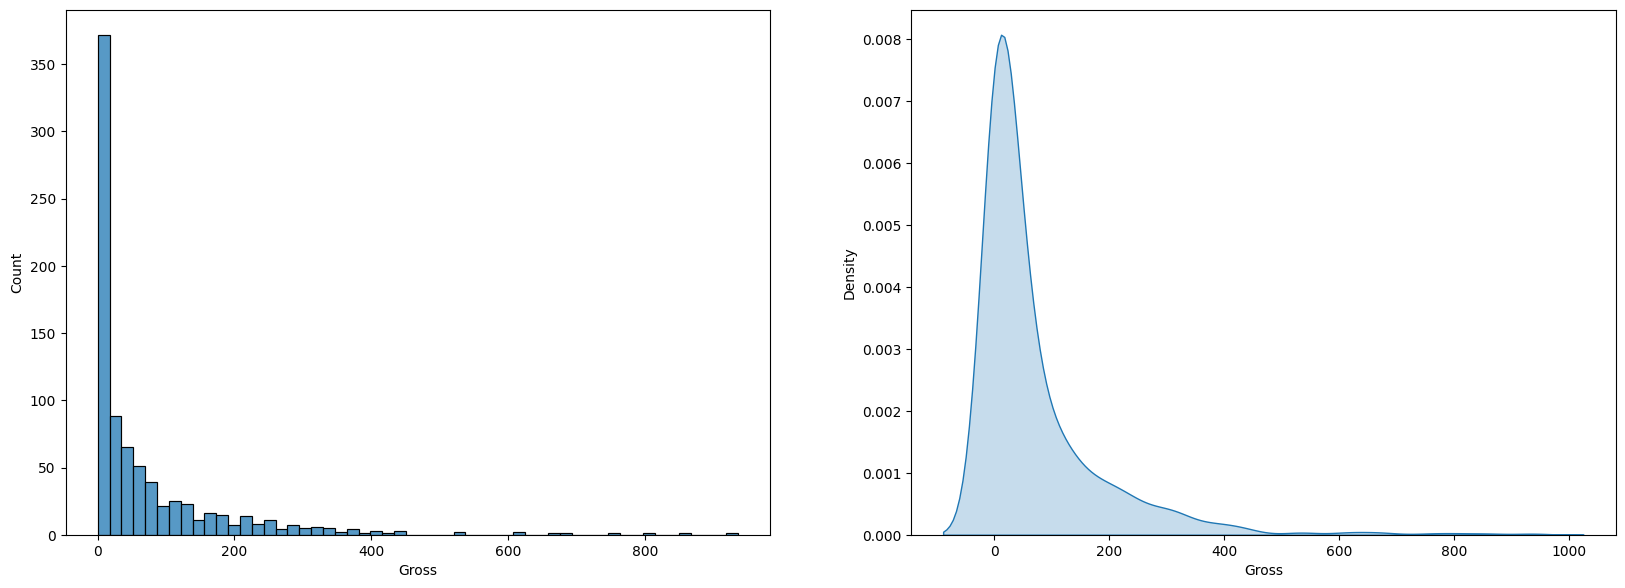

In [18]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.histplot(df.Gross, palette='viridis'[3])
plt.subplot(2, 2, 2)
sns.kdeplot(df.Gross, palette='magma'[3], fill=True)
plt.show()


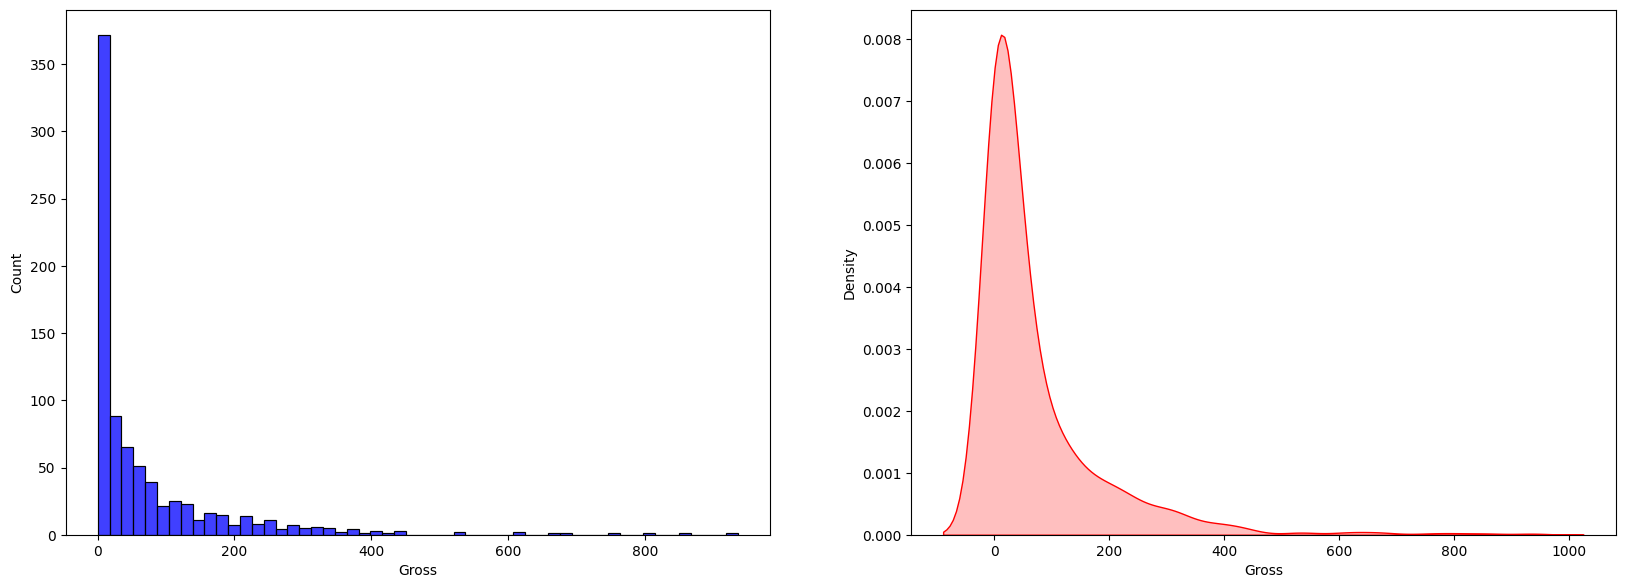

In [20]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.histplot(df.Gross, color='blue')  # Doğru renk belirlemesi
plt.subplot(2, 2, 2)
sns.kdeplot(df.Gross, color='red', fill=True)  # Doğru renk belirlemesi ve alan doldurma
plt.show()








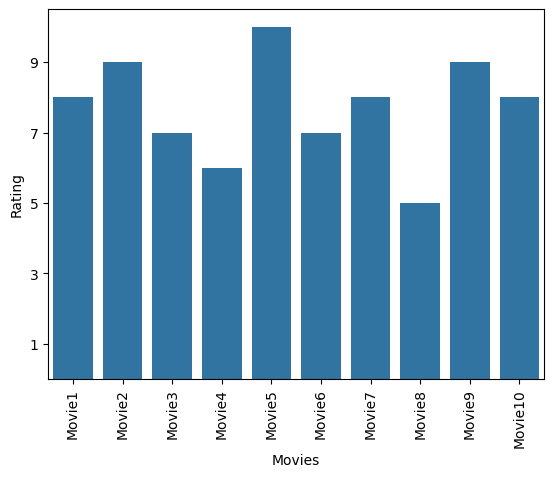

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Örnek bir DataFrame oluşturma
import pandas as pd
data = {'Movie Name': ['Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5', 'Movie6', 'Movie7', 'Movie8', 'Movie9', 'Movie10'],
        'Movie Rating': [8, 9, 7, 6, 10, 7, 8, 5, 9, 8]}
top10Movies = pd.DataFrame(data)

# Çubuk grafiği oluşturma
sns.barplot(x='Movie Name', y='Movie Rating', data=top10Movies)
plt.xticks(rotation=90)
plt.yticks(range(1, 11, 2))
plt.ylabel("Rating")
plt.xlabel("Movies")

# Grafiği gösterme
plt.show()

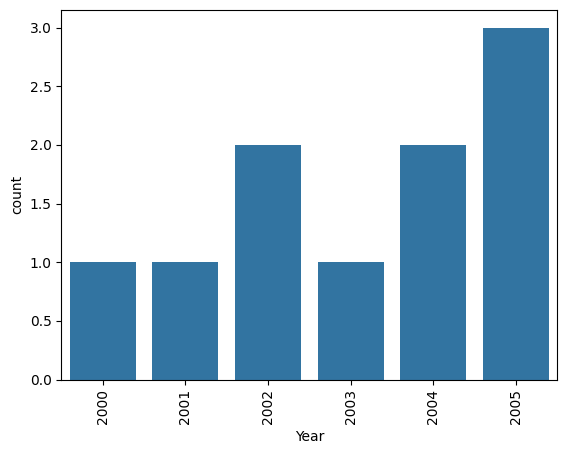

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Örnek bir DataFrame oluşturma
data = {'ReleaseYear': [2000, 2001, 2002, 2002, 2003, 2004, 2004, 2005, 2005, 2005]}
data = pd.DataFrame(data)

# Countplot oluşturma
sns.countplot(data=data, x='ReleaseYear')
plt.xticks(rotation=90)
plt.xlabel("Year")

# Grafiği gösterme
plt.show()


# # Değişkenler Arası İlişkiler # #

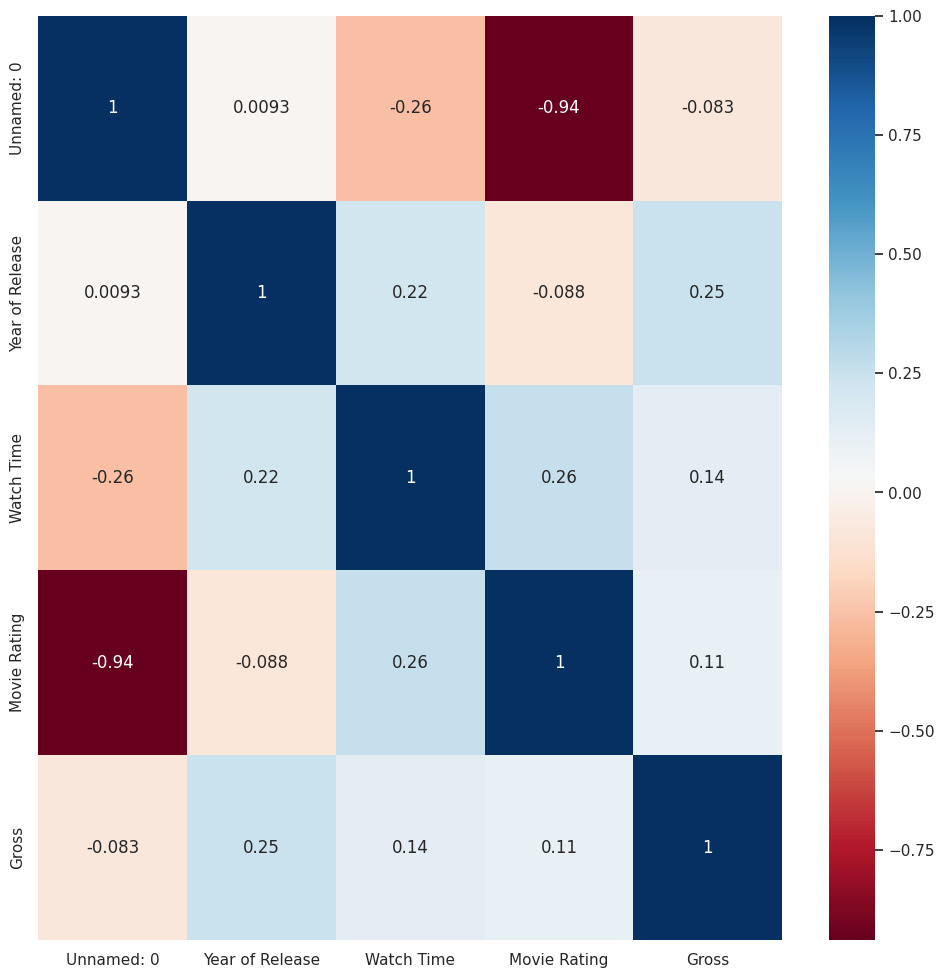

In [25]:
corr = df[num_cols].corr()

# Korelasyon haritasını oluşturalım
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)  # annot=True ile korelasyon değerlerini göster
plt.show()

# # Özellik Mühendisliği # #  
** Makine öğrenmesi ve veri bilimi projelerinde modelin performansını artırmak için veri setindeki ham verileri kullanarak yeni özellikler (features) oluşturma sürecidir.

# Bu Başlık bazında anlamlı ve veri setimle bağdaşan bir kod ne kadar uğraşsam da yazamadım #

# # Eksik Değerler # #

In [30]:
df.isnull().sum()

Cost Per Month - Basic ($)    0
dtype: int64